In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [33]:
df = pd.read_csv('mushrooms.csv')

In [36]:

X = df.drop('class', axis=1)
y = df['class'].apply(lambda x: 1 if x == 'p' else 0) # Encode target: p=1, e=0
X_encoded = pd.get_dummies(X, drop_first=False)

In [37]:
print("Part A: Initial Analysis")
print("Dimensions of the dataset after one-hot encoding:")
print(X_encoded.shape)
print("-" * 50)

Part A: Initial Analysis
Dimensions of the dataset after one-hot encoding:
(8124, 117)
--------------------------------------------------


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [ ]:

# 1. Apply PCA
# Perform PCA on the standardized, one-hot encoded dataset
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


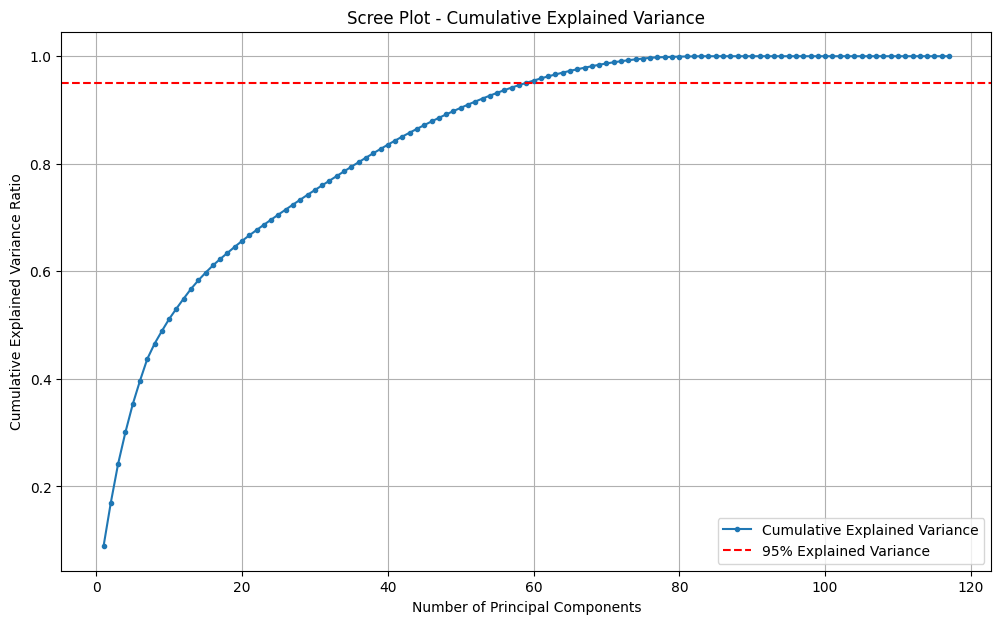

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(12, 7))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='.', linestyle='-', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
n_components_95 = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1
print(f"Number of components to retain 95% of variance: {n_components_95}")
print("-" * 50)


Number of components to retain 95% of variance: 59
--------------------------------------------------


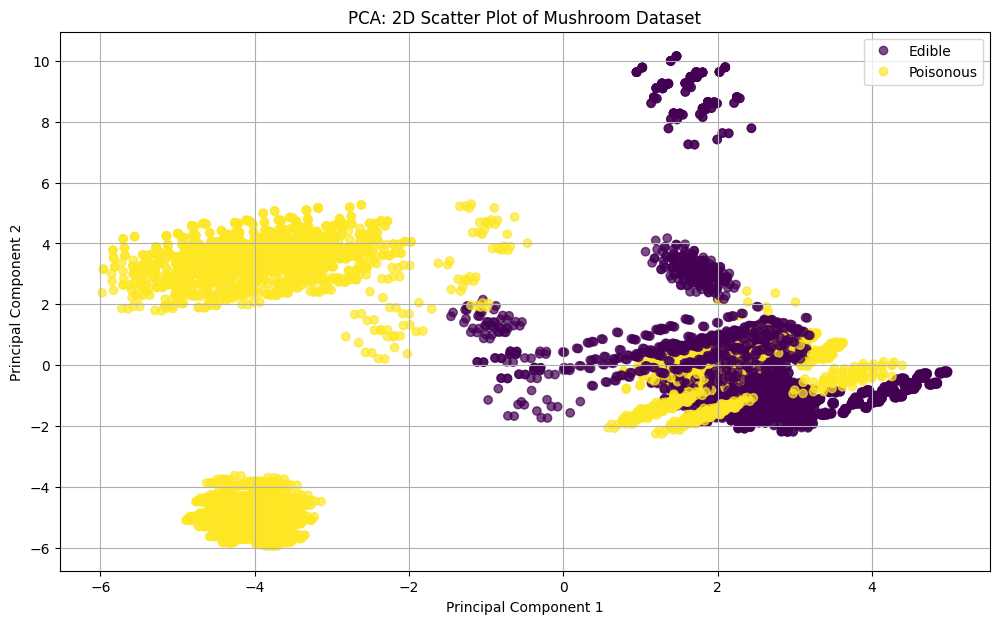

In [42]:
plt.figure(figsize=(12, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('PCA: 2D Scatter Plot of Mushroom Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Edible', 'Poisonous'])
plt.grid(True)
plt.show()
